# Imports necessários

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from numpy import mean
from numpy import std
from matplotlib import pyplot
import seaborn as sns

# Import dos dados

## Receitas

In [2]:
dados_receitas = pd.read_csv('data/dados_receitas.csv', sep=';')
dados_receitas.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS
0,1722010101,2013-01-03,886cd0eabf5a18,185560.68,prefeitura municipal
1,1722010101,2013-01-04,886cd0eabf5a18,8081.80,prefeitura municipal
2,1722010101,2013-01-07,886cd0eabf5a18,4231.39,prefeitura municipal
3,1722010101,2013-01-08,886cd0eabf5a18,10536.53,prefeitura municipal
4,1722010101,2013-01-15,886cd0eabf5a18,103118.27,prefeitura municipal


# Feature Engineering

## Receitas

### Tratamento das colunas de tempo

In [3]:
# Converter a coluna 'DATA' para o tipo datetime
dados_receitas['DATA'] = pd.to_datetime(dados_receitas['DATA'])

# Extrair o ano e mês da coluna 'DATA' como novas features
dados_receitas['ANO_MES'] = dados_receitas['DATA'].dt.strftime('%Y-%m')

# Extrair o ano, mês e dia da coluna 'DATA' como novas features
dados_receitas['ANO'] = dados_receitas['DATA'].dt.year

In [4]:
df_organizado = dados_receitas.groupby(['ANO_MES', 'ANO'])['VALOR_ARRECADADO'].sum().reset_index()
df_organizado.head()

,ANO_MES,ANO,VALOR_ARRECADADO
0,2013-01,2013,5865563.10
1,2013-02,2013,6979863.94
2,2013-03,2013,6038308.84
3,2013-04,2013,6036720.77
4,2013-05,2013,6566028.25


In [5]:
df_organizado.shape

(120, 3)

### Sample dos dados

In [6]:
df_organizado['SMA(12)'] = df_organizado['VALOR_ARRECADADO'].rolling(window=12).mean()
df_organizado['SMA(6)'] = df_organizado['VALOR_ARRECADADO'].rolling(window=6).mean()
df_organizado['SMA(3)'] = df_organizado['VALOR_ARRECADADO'].rolling(window=3).mean()
df_organizado['SMA(2)'] = df_organizado['VALOR_ARRECADADO'].rolling(window=2).mean()
df_organizado.head()

,ANO_MES,ANO,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2)
0,2013-01,2013,5865563.10,NaN,NaN,NaN,NaN
1,2013-02,2013,6979863.94,NaN,NaN,NaN,6422713.520
2,2013-03,2013,6038308.84,NaN,NaN,6.294579e+06,6509086.390
3,2013-04,2013,6036720.77,NaN,NaN,6.351631e+06,6037514.805
4,2013-05,2013,6566028.25,NaN,NaN,6.213686e+06,6301374.510


In [7]:
df_organizado['lag(12)'] = df_organizado['VALOR_ARRECADADO'].shift(12)
df_organizado['lag(6)'] = df_organizado['VALOR_ARRECADADO'].shift(6)
df_organizado['lag(4)'] = df_organizado['VALOR_ARRECADADO'].shift(4)
df_organizado['lag(3)'] = df_organizado['VALOR_ARRECADADO'].shift(3)
df_organizado['lag(2)'] = df_organizado['VALOR_ARRECADADO'].shift(2)
df_organizado['lag(1)'] = df_organizado['VALOR_ARRECADADO'].shift(1)
df_organizado.head()

,ANO_MES,ANO,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
0,2013-01,2013,5865563.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-02,2013,6979863.94,NaN,NaN,NaN,6422713.520,NaN,NaN,NaN,NaN,NaN,5865563.10
2,2013-03,2013,6038308.84,NaN,NaN,6.294579e+06,6509086.390,NaN,NaN,NaN,NaN,5865563.10,6979863.94
3,2013-04,2013,6036720.77,NaN,NaN,6.351631e+06,6037514.805,NaN,NaN,NaN,5865563.10,6979863.94,6038308.84
4,2013-05,2013,6566028.25,NaN,NaN,6.213686e+06,6301374.510,NaN,NaN,5865563.1,6979863.94,6038308.84,6036720.77


In [8]:
df_organizado.dropna(inplace=True)
df_organizado.head()

,ANO_MES,ANO,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
12,2014-01,2014,7861439.06,7.285472e+06,7.973253e+06,8.161389e+06,8167542.965,5865563.10,6784352.82,7980163.57,7058840.99,8149080.25,8473646.87
13,2014-02,2014,8228264.74,7.389505e+06,7.958573e+06,8.187784e+06,8044851.900,6979863.94,8316345.74,7058840.99,8149080.25,8473646.87,7861439.06
14,2014-03,2014,6835740.62,7.455958e+06,7.767835e+06,7.641815e+06,7532002.680,6038308.84,7980163.57,8149080.25,8473646.87,7861439.06,8228264.74
15,2014-04,2014,8223473.05,7.638187e+06,7.961941e+06,7.762493e+06,7529606.835,6036720.77,7058840.99,8473646.87,7861439.06,8228264.74,6835740.62
16,2014-05,2014,8270822.01,7.780253e+06,7.982231e+06,7.776679e+06,8247147.530,6566028.25,8149080.25,7861439.06,8228264.74,6835740.62,8223473.05


In [9]:
df_organizado.drop(columns=['ANO'], inplace=True)

In [10]:
df_organizado['ANO_MES'] = pd.to_datetime(df_organizado['ANO_MES'])
df_organizado['ANO_MES'] = df_organizado['ANO_MES'].map(dt.datetime.toordinal)

### Implementação do modelo

In [86]:
train_size = int(len(df_organizado) * 0.75)
train_dataset, test_dataset = df_organizado.iloc[:train_size], df_organizado.iloc[train_size:]

In [87]:
train_dataset.head()

,ANO_MES,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
12,735234,7861439.06,7.285472e+06,7.973253e+06,8.161389e+06,8167542.965,5865563.10,6784352.82,7980163.57,7058840.99,8149080.25,8473646.87
13,735265,8228264.74,7.389505e+06,7.958573e+06,8.187784e+06,8044851.900,6979863.94,8316345.74,7058840.99,8149080.25,8473646.87,7861439.06
14,735293,6835740.62,7.455958e+06,7.767835e+06,7.641815e+06,7532002.680,6038308.84,7980163.57,8149080.25,8473646.87,7861439.06,8228264.74
15,735324,8223473.05,7.638187e+06,7.961941e+06,7.762493e+06,7529606.835,6036720.77,7058840.99,8473646.87,7861439.06,8228264.74,6835740.62
16,735354,8270822.01,7.780253e+06,7.982231e+06,7.776679e+06,8247147.530,6566028.25,8149080.25,7861439.06,8228264.74,6835740.62,8223473.05


Dimension of train data:  (81, 12)
Dimension of test data:  (27, 12)


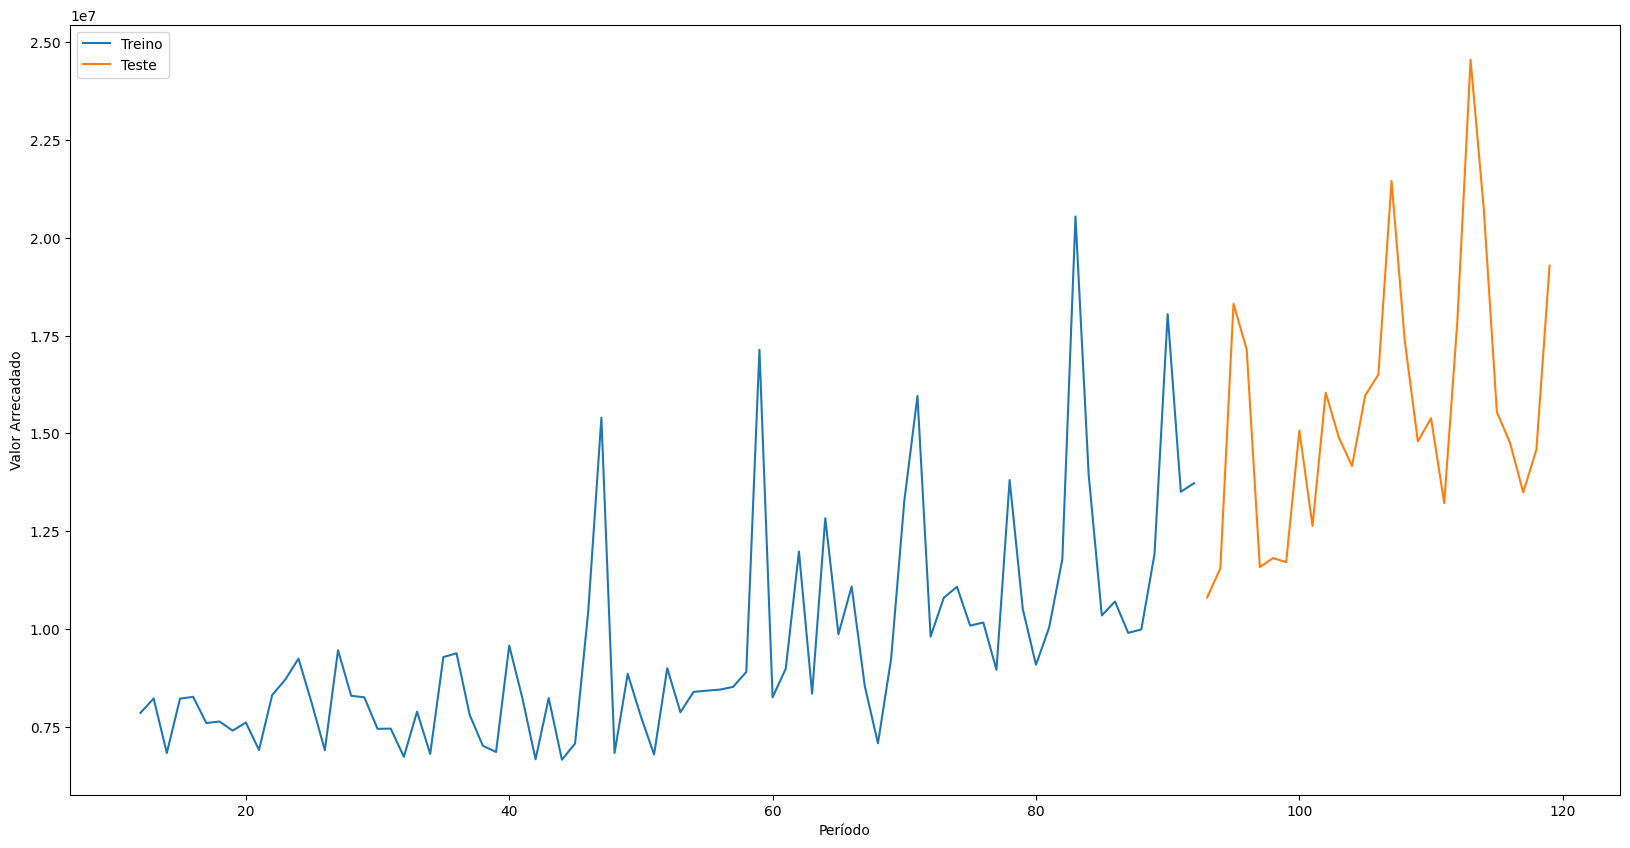

In [88]:
plt.figure(figsize=(20,10))
plt.plot(train_dataset['VALOR_ARRECADADO'])
plt.plot(test_dataset['VALOR_ARRECADADO'])
plt.xlabel('Período')
plt.ylabel('Valor Arrecadado')
plt.legend(['Treino', 'Teste'], loc='upper left')
print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [89]:
X_train = train_dataset.drop(['VALOR_ARRECADADO'], axis=1)
y_train = train_dataset.loc[:, ['VALOR_ARRECADADO']]

In [90]:
X_test = test_dataset.drop(['VALOR_ARRECADADO'], axis=1)
y_test = test_dataset.loc[:, ['VALOR_ARRECADADO']]

In [91]:
print('Dimension of X_train data: ', X_train.shape)
print('Dimension of y_train data: ', y_train.shape)
print('Dimension of X_test data: ', X_test.shape)
print('Dimension of y_test data: ', y_test.shape)

Dimension of X_train data:  (81, 11)
Dimension of y_train data:  (81, 1)
Dimension of X_test data:  (27, 11)
Dimension of y_test data:  (27, 1)


In [92]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

In [93]:
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

In [94]:
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

In [95]:
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [96]:
print('Dimension of train_y_norm data: ', train_x_norm.shape)
print('Dimension of train_x_norm data: ', train_y_norm.shape)
print('Dimension of test_y_norm data: ', test_x_norm.shape)
print('Dimension of test_x_norm data: ', test_y_norm.shape)

Dimension of train_y_norm data:  (81, 11)
Dimension of train_x_norm data:  (81, 1)
Dimension of test_y_norm data:  (27, 11)
Dimension of test_x_norm data:  (27, 1)


In [97]:
X_test = test_x_norm.reshape((test_x_norm.shape[0], 1, test_x_norm.shape[1]))
X_train = train_x_norm.reshape((train_x_norm.shape[0], 1, train_x_norm.shape[1]))
y_test = test_y_norm.reshape((test_y_norm.shape[0], 1))
y_train = train_y_norm.reshape((train_y_norm.shape[0], 1))

Ajuste no modelo com 32, 64 e 128 neurônios para verficação do mais adequado para a aplicação.

Epoch 1/100
16/16 [==============================] - 10s 164ms/step - loss: 0.0381 - val_loss: 0.1467
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0243 - val_loss: 0.0950
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0198 - val_loss: 0.0658
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0191 - val_loss: 0.0556
Epoch 5/100
16/16 [==============================] - 0s 11ms/step - loss: 0.0190 - val_loss: 0.0528
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0171 - val_loss: 0.0473
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0165 - val_loss: 0.0409
Epoch 8/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0154 - val_loss: 0.0362
Epoch 9/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0132 - val_loss: 0.0313
Epoch 10/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0133 - val_loss: 0.0272


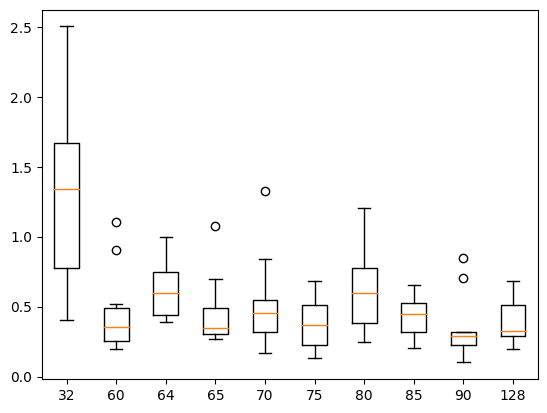

In [23]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = neurons))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=4)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('src/static/images/figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>Neurons={p}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [32, 60, 64, 65, 70, 75, 80, 85, 90, 128]
run_experiment(n_params)

Ajuste de modelo com tamanho do lote 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 e 12, para verificação do mais adequado para a aplicação.

Epoch 1/50
64/64 [==============================] - 10s 37ms/step - loss: 0.0174 - val_loss: 0.0334
Epoch 2/50
64/64 [==============================] - 1s 9ms/step - loss: 0.0132 - val_loss: 0.0251
Epoch 3/50
64/64 [==============================] - 1s 9ms/step - loss: 0.0113 - val_loss: 0.0170
Epoch 4/50
64/64 [==============================] - 0s 8ms/step - loss: 0.0081 - val_loss: 0.0105
Epoch 5/50
64/64 [==============================] - 1s 8ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 6/50
64/64 [==============================] - 1s 8ms/step - loss: 0.0052 - val_loss: 0.0087
Epoch 7/50
64/64 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 0.0073
Epoch 8/50
64/64 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0131
Epoch 9/50
64/64 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 10/50
64/64 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0058
Epoch 11/50
64/64

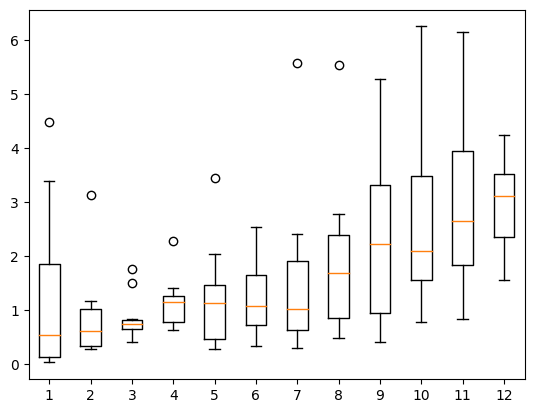

In [24]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=batch_size)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('src/static/images/figura[1].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = np.arange(1, 13)
run_experiment(n_params)

Ajuste no modelo com diluição - dropout - 0.05, 0.1, 0.2, 0.3, para verficação do mais adequado para a aplicação.

Epoch 1/50
13/13 [==============================] - 9s 142ms/step - loss: 0.0322 - val_loss: 0.1020
Epoch 2/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0170 - val_loss: 0.0458
Epoch 3/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0172 - val_loss: 0.0381
Epoch 4/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0158 - val_loss: 0.0383
Epoch 5/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0136 - val_loss: 0.0295
Epoch 6/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0116 - val_loss: 0.0244
Epoch 7/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0108 - val_loss: 0.0204
Epoch 8/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0094 - val_loss: 0.0175
Epoch 9/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0083 - val_loss: 0.0146
Epoch 10/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0077 - val_loss: 0.0137
Epoch 11

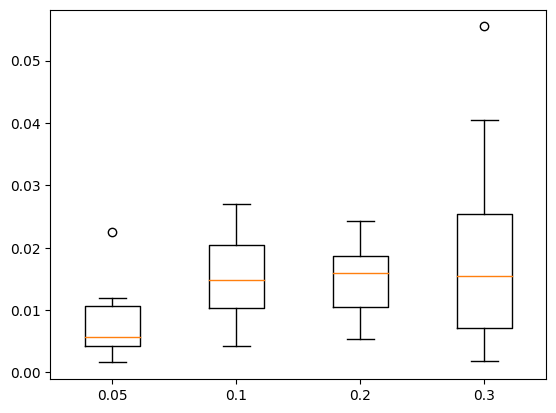

In [25]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=5)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('src/static/images/figura[2].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [0.05, 0.1, 0.2, 0.3]
run_experiment(n_params)

Ajustando o modelo com os padrões mais adequados visualizados nos testes anteriores.

<p>Neurônios = 128</p>
<p>Tamanho do lote/batch = 2</p>
<p>Dopout = 0.1</p>

In [98]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = 128))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=150, batch_size=2, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=8)
    return loss

# Resumindo as pontuações
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print(f'Loss: Mean = {m:.3f}, Std = {s:.3f}')

# Rodando um experimento
def run_experiment(repeats = 10):
    # repetindo o experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score
        scores.append(score)
        print(f'>{r+1}: Score={score}')
    # resumindo os resultados
    summarize_results(scores)

# Rodando o experimento
run_experiment()

Epoch 1/150
32/32 [==============================] - 18s 199ms/step - loss: 0.0175 - val_loss: 0.0376
Epoch 2/150
32/32 [==============================] - 1s 34ms/step - loss: 0.0152 - val_loss: 0.0299
Epoch 3/150
32/32 [==============================] - 1s 40ms/step - loss: 0.0114 - val_loss: 0.0202
Epoch 4/150
32/32 [==============================] - 1s 31ms/step - loss: 0.0078 - val_loss: 0.0133
Epoch 5/150
32/32 [==============================] - 1s 31ms/step - loss: 0.0064 - val_loss: 0.0082
Epoch 6/150
32/32 [==============================] - 1s 30ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 7/150
32/32 [==============================] - 1s 25ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 8/150
32/32 [==============================] - 1s 25ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 9/150
32/32 [==============================] - 1s 39ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 10/150
32/32 [==============================] - 1s 31ms/step - loss: 0.0042 - val_loss: 0.00

Criando modelo:

In [99]:
def create_model(units, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = units, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = units))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    return model

In [100]:
model_lstm = create_model(128, 0.1)

In [101]:
def fit_model(model):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=150, batch_size=2, validation_split = 0.2, shuffle=False, callbacks=[early_stop])
    return history

In [102]:
history_lstm = fit_model(model_lstm)

Epoch 1/150


32/32 [==============================] - 12s 87ms/step - loss: 0.0182 - val_loss: 0.0398
Epoch 2/150
32/32 [==============================] - 0s 15ms/step - loss: 0.0152 - val_loss: 0.0319
Epoch 3/150
32/32 [==============================] - 0s 13ms/step - loss: 0.0119 - val_loss: 0.0228
Epoch 4/150
32/32 [==============================] - 0s 14ms/step - loss: 0.0093 - val_loss: 0.0161
Epoch 5/150
32/32 [==============================] - 0s 14ms/step - loss: 0.0063 - val_loss: 0.0087
Epoch 6/150
32/32 [==============================] - 0s 14ms/step - loss: 0.0059 - val_loss: 0.0064
Epoch 7/150
32/32 [==============================] - 0s 13ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 8/150
32/32 [==============================] - 0s 12ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 9/150
32/32 [==============================] - 0s 13ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 10/150
32/32 [==============================] - 0s 12ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 11/1

Salvando modelo:

In [103]:
model_lstm.save('receitas_2013_2022')

INFO:tensorflow:Assets written to: receitas_2013_2022\assets


INFO:tensorflow:Assets written to: receitas_2013_2022\assets


Carga do modelo salvo:

In [104]:
model_lstm = tf.keras.models.load_model('receitas_2013_2022')

Pré-processamento e predição da base de testes com a utilização do modelo carregado:

In [105]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [106]:
def prediction(model):
    y_pred = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred)
    return y_pred

In [107]:
prediction_lstm = prediction(model_lstm)

1/1 [==============================] - 4s 4s/step


In [108]:
def plot_future(prediction, y_test):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='Dados reais')
    plt.plot(np.arange(range_future), np.array(prediction),label='Predição')
    plt.legend(loc='upper left')
    plt.xlabel('Período')
    plt.ylabel('Valor Arrecadado')
    plt.title('Predição de Receitas - LSTM')
    plt.savefig('src/static/images/figura[3].png')
    plt.show()

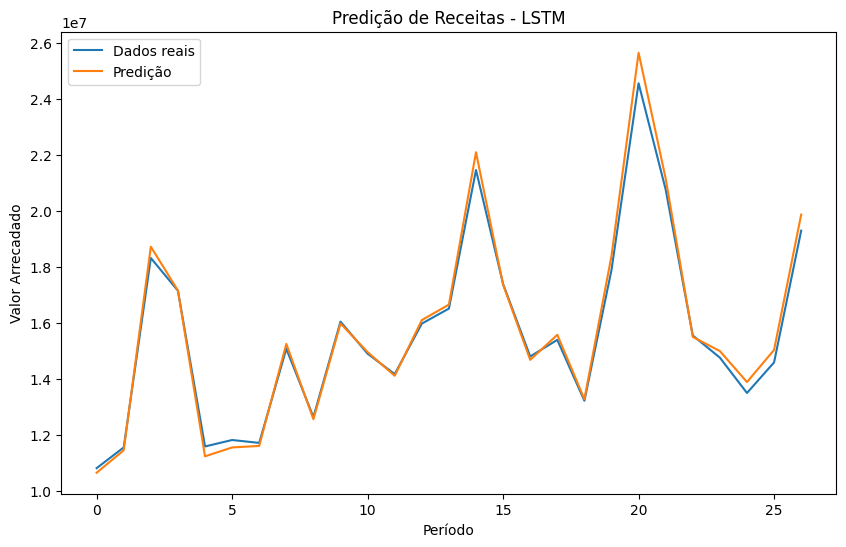

In [109]:
plot_future(prediction_lstm, y_test)

Cálculo do erro médio absoluto e raiz quadrática média:

In [110]:
def evaluate_prediction(prediction_lstm, actual, model_name):
    errors = prediction_lstm - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(f'{model_name}:')
    print(f'MSE = {mse:.2f}; RMSE = {rmse:.2f}; MAE = {mae:.2f}')

In [111]:
evaluate_prediction(prediction_lstm, y_test, 'LSTM')

LSTM:
MSE = 121386834366.62; RMSE = 348406.13; MAE = 251706.77


Pré-processamento dos dados e aplicação do modelo em toda a base de dados (treino + teste):

In [112]:
X = df_organizado.drop(['VALOR_ARRECADADO'], axis=1)
y = df_organizado.loc[:, ['VALOR_ARRECADADO']]

In [113]:
y_norm = output_scaler.transform(y)
X_norm = input_scaler.transform(X)

In [114]:
X = X_norm.reshape((X_norm.shape[0], 1, X_norm.shape[1]))
y = y_norm.reshape((y_norm.shape[0], 1))

In [115]:
y = scaler_y.inverse_transform(y)

In [116]:
def prediction(model):
    y_pred = model.predict(X)
    y_pred = scaler_y.inverse_transform(y_pred)
    return y_pred

In [117]:
prediction_lstm = prediction(model_lstm)

4/4 [==============================] - 0s 8ms/step


In [118]:
def plot_future(prediction, y):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y), label='Dados reais')
    plt.plot(np.arange(range_future), np.array(prediction),label='Predição')
    plt.legend(loc='upper left')
    plt.xlabel('Período')
    plt.ylabel('Valor Arrecadado')
    plt.title('Predição de Receitas - LSTM')
    plt.savefig('src/static/images/figura[4].png')
    plt.show()

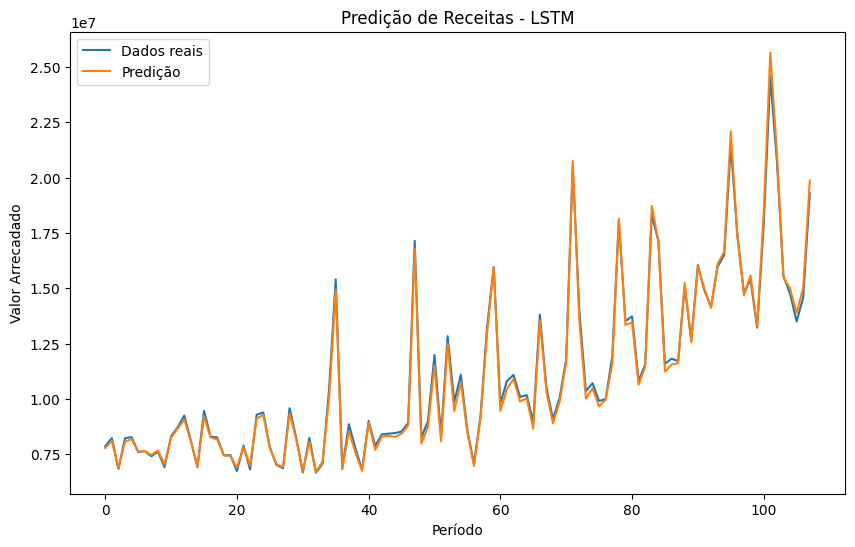

In [119]:
plot_future(prediction_lstm, y)

Cálculo do erro médio percentual:

In [120]:
real = y.flatten()
previsto = prediction_lstm.flatten()

In [121]:
tabela = pd.DataFrame([real, previsto]).T
tabela = tabela.rename(columns={0: 'Real', 1: 'Previsto'})
tabela['Diferenca'] = 1 - (tabela['Real'] / tabela['Previsto'])
media_tabela = tabela['Diferenca'].mean() * 100
print(f'Erro médio percentual: {media_tabela:.2f}%')

Erro médio percentual: -0.84%


Distribuição de erros:

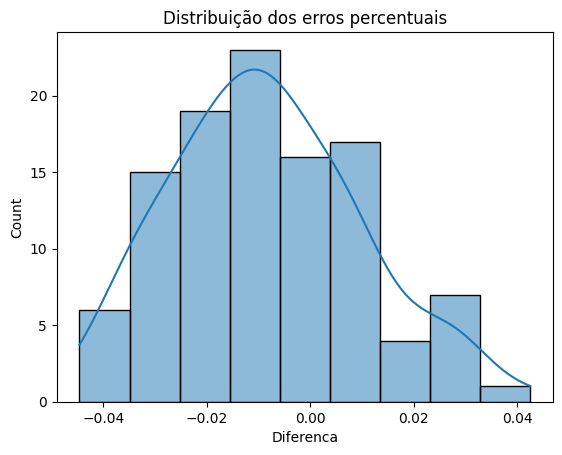

In [122]:
sns.histplot(data=tabela, x='Diferenca', kde=True).set_title('Distribuição dos erros percentuais').get_figure().savefig('src/static/images/figura[5].png')

In [123]:
previsao = df_organizado

In [124]:
previsao

,ANO_MES,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
12,735234,7861439.06,7.285472e+06,7.973253e+06,8.161389e+06,8.167543e+06,5865563.10,6784352.82,7980163.57,7058840.99,8149080.25,8473646.87
13,735265,8228264.74,7.389505e+06,7.958573e+06,8.187784e+06,8.044852e+06,6979863.94,8316345.74,7058840.99,8149080.25,8473646.87,7861439.06
14,735293,6835740.62,7.455958e+06,7.767835e+06,7.641815e+06,7.532003e+06,6038308.84,7980163.57,8149080.25,8473646.87,7861439.06,8228264.74
15,735324,8223473.05,7.638187e+06,7.961941e+06,7.762493e+06,7.529607e+06,6036720.77,7058840.99,8473646.87,7861439.06,8228264.74,6835740.62
16,735354,8270822.01,7.780253e+06,7.982231e+06,7.776679e+06,8.247148e+06,6566028.25,8149080.25,7861439.06,8228264.74,6835740.62,8223473.05
...,...,...,...,...,...,...,...,...,...,...,...,...
115,738368,15546474.80,1.730145e+07,1.789007e+07,2.028313e+07,1.815041e+07,14895904.74,14796988.62,13218515.53,17882570.38,24548567.19,20754348.32
116,738399,14755666.11,1.735041e+07,1.778436e+07,1.701883e+07,1.515107e+07,14168150.37,15389970.91,17882570.38,24548567.19,20754348.32,15546474.80
117,738429,13494171.35,1.714406e+07,1.783030e+07,1.459877e+07,1.412492e+07,15970308.83,13218515.53,24548567.19,20754348.32,15546474.80,14755666.11
118,738460,14586556.77,1.698410e+07,1.728096e+07,1.427880e+07,1.404036e+07,16506070.90,17882570.38,20754348.32,15546474.80,14755666.11,13494171.35


In [125]:
periodo = 10  # escolha o período de previsão à frente será executado

for i in range(periodo):
    # Crie uma nova linha de dados vazia
    row = pd.DataFrame(columns=previsao.columns)

    # Calcule as médias e valores de atraso
    row.loc[0, 'SMA(12)'] = previsao['VALOR_ARRECADADO'].iloc[-12:].mean()
    row.loc[0, 'SMA(6)'] = previsao['VALOR_ARRECADADO'].iloc[-6:].mean()
    row.loc[0, 'SMA(3)'] = previsao['VALOR_ARRECADADO'].iloc[-3:].mean()
    row.loc[0, 'SMA(2)'] = previsao['VALOR_ARRECADADO'].iloc[-2:].mean()
    row.loc[0, 'lag(12)'] = previsao['VALOR_ARRECADADO'].iloc[-12]
    row.loc[0, 'lag(6)'] = previsao['VALOR_ARRECADADO'].iloc[-6]
    row.loc[0, 'lag(4)'] = previsao['VALOR_ARRECADADO'].iloc[-4]
    row.loc[0, 'lag(3)'] = previsao['VALOR_ARRECADADO'].iloc[-3]
    row.loc[0, 'lag(2)'] = previsao['VALOR_ARRECADADO'].iloc[-2]
    row.loc[0, 'lag(1)'] = previsao['VALOR_ARRECADADO'].iloc[-1]

    # Incremente a data
    row.loc[0, 'ANO_MES'] = previsao['ANO_MES'].iloc[-1]+1
    
    # Excluindo a coluna de valor arrecadado
    row = row.drop(['VALOR_ARRECADADO'], axis=1)
    
    # Transforme a linha em um array e normalize
    row = np.array(row.iloc[-1]).reshape(1, -1)
    row_norm = input_scaler.transform(row)

    # Preveja usando o modelo LSTM
    to_prev = row_norm.reshape((row_norm.shape[0], 1, row_norm.shape[1]))
    prev = model_lstm.predict(to_prev)
    prev = scaler_y.inverse_transform(prev)

    # Crie um DataFrame com a previsão e adicione ao DataFrame principal
    row_ = pd.DataFrame(row, columns = ['ANO_MES', 'SMA(12)', 'SMA(6)', 'SMA(3)', 'SMA(2)', 'lag(12)', 'lag(6)', 'lag(4)', 'lag(3)', 'lag(2)', 'lag(1)'])
    row_.loc[0, 'VALOR_ARRECADADO'] = prev[0]
    previsao = pd.concat([previsao, row_], ignore_index=True)

1/1 [==============================] - ETA: 0s

c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - ETA: 0s

c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step


In [126]:
previsao

,ANO_MES,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
0,735234,7861439.06,7285471.934167,7973252.746667,8161388.726667,8167542.965,5865563.1,6784352.82,7980163.57,7058840.99,8149080.25,8473646.87
1,735265,8228264.74,7389505.334167,7958572.58,8187783.556667,8044851.9,6979863.94,8316345.74,7058840.99,8149080.25,8473646.87,7861439.06
2,735293,6835740.62,7455957.9825,7767835.421667,7641814.806667,7532002.68,6038308.84,7980163.57,8149080.25,8473646.87,7861439.06,8228264.74
3,735324,8223473.05,7638187.339167,7961940.765,7762492.803333,7529606.835,6036720.77,7058840.99,8473646.87,7861439.06,8228264.74,6835740.62
4,735354,8270822.01,7780253.485833,7982231.058333,7776678.56,8247147.53,6566028.25,8149080.25,7861439.06,8228264.74,6835740.62,8223473.05
...,...,...,...,...,...,...,...,...,...,...,...,...
113,738496,16804558.00,17129132.871667,16977301.653333,16932014.0,17045234.0,24548567.19,19287535.92,17593284.0,16705574.0,16514418.0,17576050.0
114,738497,17492400.00,16483798.7725,16563472.0,16965008.666667,17190304.0,20754348.32,14186948.0,16705574.0,16514418.0,17576050.0,16804558.0
115,738498,17405930.00,16211969.745833,17114380.666667,17291002.666667,17148479.0,15546474.8,17593284.0,16514418.0,17576050.0,16804558.0,17492400.0
116,738499,17508954.00,16366924.345833,17083155.0,17234296.0,17449165.0,14755666.11,16705574.0,17576050.0,16804558.0,17492400.0,17405930.0
